#Car Price Analysis

##Importing the libraries

In [ ]:
# Import libraries and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

##Loading the data

In [ ]:
# Mount Google Drive to access the data
from google.colab import drive
drive.mount('/content/drive')

# Load the data from Google Drive
file_path = '/content/drive/MyDrive/carPrice.csv'
df = pd.read_csv(file_path)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


##Exploratory Data Analysis

In [ ]:
df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [ ]:
df.shape

(205, 26)

In [ ]:
df.columns.values

array(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation',
       'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem',
       'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', 'price'], dtype=object)

In [ ]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [ ]:
# Validate missing values
print("Missing values in each column:\n", df.isnull().sum())

Missing values in each column:
 car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


In [ ]:
# Check for duplicates
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


In [ ]:
# Drop the 'car_ID' column
df.drop('car_ID', axis=1, inplace=True)
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
# Show descriptive statistics
print("Descriptive statistics:\n", df.describe())

Descriptive statistics:
         symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000   
mean     0.834146   98.756585  174.049268   65.907805   53.724878   
std      1.245307    6.021776   12.337289    2.145204    2.443522   
min     -2.000000   86.600000  141.100000   60.300000   47.800000   
25%      0.000000   94.500000  166.300000   64.100000   52.000000   
50%      1.000000   97.000000  173.200000   65.500000   54.100000   
75%      2.000000  102.400000  183.100000   66.900000   55.500000   
max      3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.0

In [ ]:
# Define categorical features
df_cat = df.select_dtypes(include=['object'])

In [ ]:
# Calculate and display the number of unique values for each category column
for column in df_cat.columns:
    unique_count = df_cat[column].nunique()
    print(f"Column '{column}' has {unique_count} unique values.")

Column 'CarName' has 147 unique values.
Column 'fueltype' has 2 unique values.
Column 'aspiration' has 2 unique values.
Column 'doornumber' has 2 unique values.
Column 'carbody' has 5 unique values.
Column 'drivewheel' has 3 unique values.
Column 'enginelocation' has 2 unique values.
Column 'enginetype' has 7 unique values.
Column 'cylindernumber' has 7 unique values.
Column 'fuelsystem' has 8 unique values.


In [ ]:
# Encode categorical features
label_encoder = LabelEncoder()
for column in df_cat.columns:
    df[column] = label_encoder.fit_transform(df[column])

df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,2,1,0,1,0,2,0,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,3,1,0,1,0,2,0,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,1,0,1,2,2,0,94.5,171.2,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,4,1,0,0,3,1,0,99.8,176.6,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,5,1,0,0,3,0,0,99.4,176.6,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


<ipython-input-14-5184f1574718>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_price.index, y=correlation_with_price.values, palette='viridis')


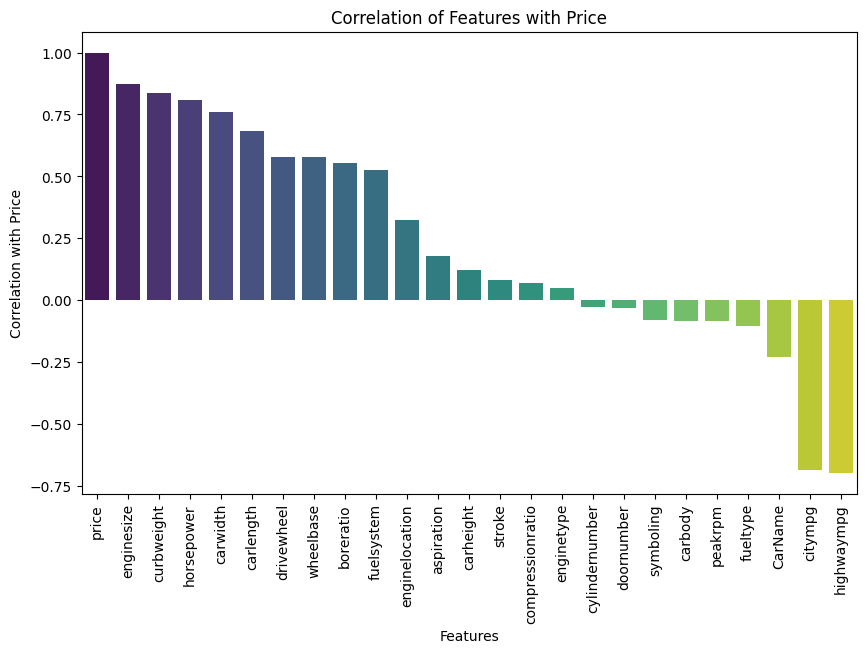

In [ ]:
# Visualization: Correlation Bar Plot
plt.figure(figsize=(10, 6))
correlation_matrix = df.corr()
correlation_with_price = correlation_matrix['price'].sort_values(ascending=False)
sns.barplot(x=correlation_with_price.index, y=correlation_with_price.values, palette='viridis')
plt.title('Correlation of Features with Price')
plt.xlabel('Features')
plt.ylabel('Correlation with Price')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Determine the most strongly correlated features with 'price'
print("Most strongly correlated features with 'price':\n", correlation_with_price)

Most strongly correlated features with 'price':
 price               1.000000
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
carlength           0.682920
drivewheel          0.577992
wheelbase           0.577816
boreratio           0.553173
fuelsystem          0.526823
enginelocation      0.324973
aspiration          0.177926
carheight           0.119336
stroke              0.079443
compressionratio    0.067984
enginetype          0.049171
cylindernumber     -0.027628
doornumber         -0.031835
symboling          -0.079978
carbody            -0.083976
peakrpm            -0.085267
fueltype           -0.105679
CarName            -0.231439
citympg            -0.685751
highwaympg         -0.697599
Name: price, dtype: float64


##Linear Regression

In [ ]:
# Declare feature vector and target variable
X = df.drop('price', axis=1)
y = df['price']

In [ ]:
# Scale the feature vector
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=365)


In [ ]:
# Create and train the linear regression model
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions on the training set
y_train_pred = reg.predict(X_train)

In [ ]:
# Make predictions on the testing set
y_test_pred = reg.predict(X_test)

In [ ]:
# Evaluate the model's performance
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

In [ ]:
print("Training set MSE:", mse_train)
print("Training set R-squared:", r2_train)
print("Testing set MSE:", mse_test)
print("Testing set R-squared:", r2_test)

Training set MSE: 6278621.9005418075
Training set R-squared: 0.885434306400939
Testing set MSE: 10739032.936029078
Testing set R-squared: 0.8859767110709513


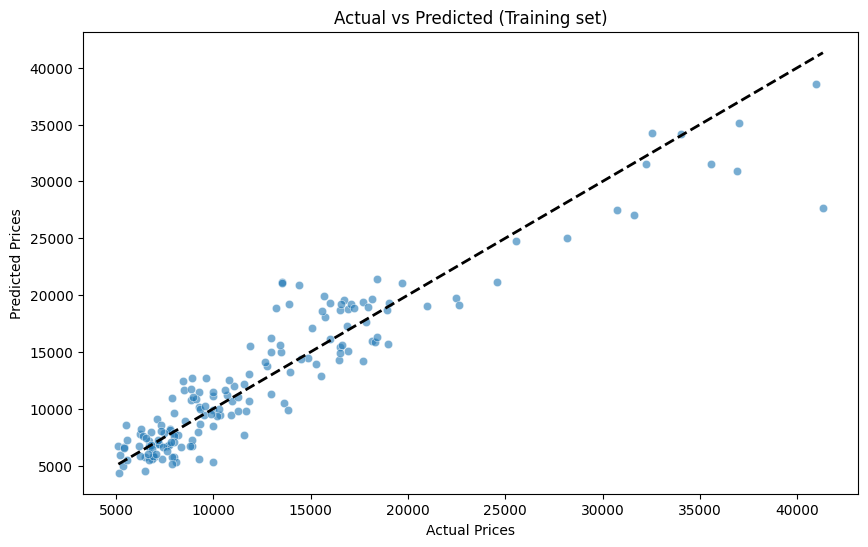

In [ ]:
# Visualization: Actual vs Predicted values (Training set)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_train, y=y_train_pred, alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.title('Actual vs Predicted (Training set)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

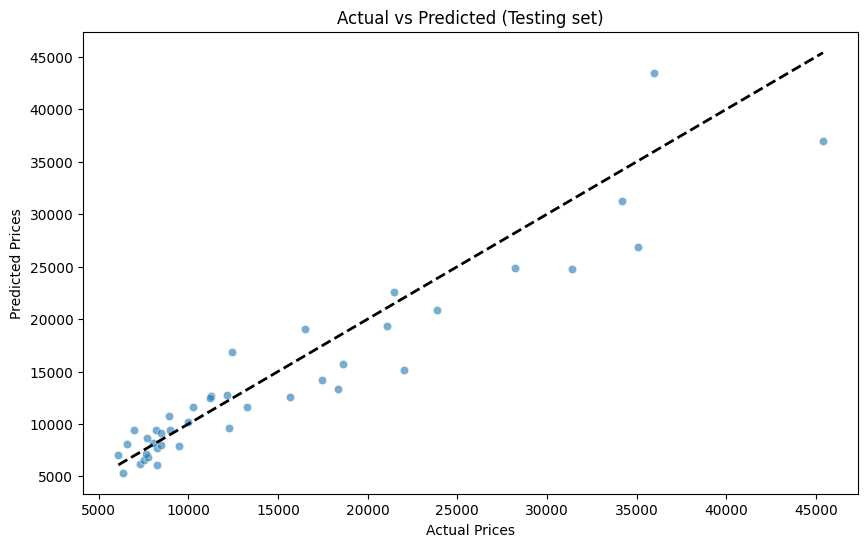

In [ ]:
# Visualization: Actual vs Predicted values (Testing set)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Actual vs Predicted (Testing set)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

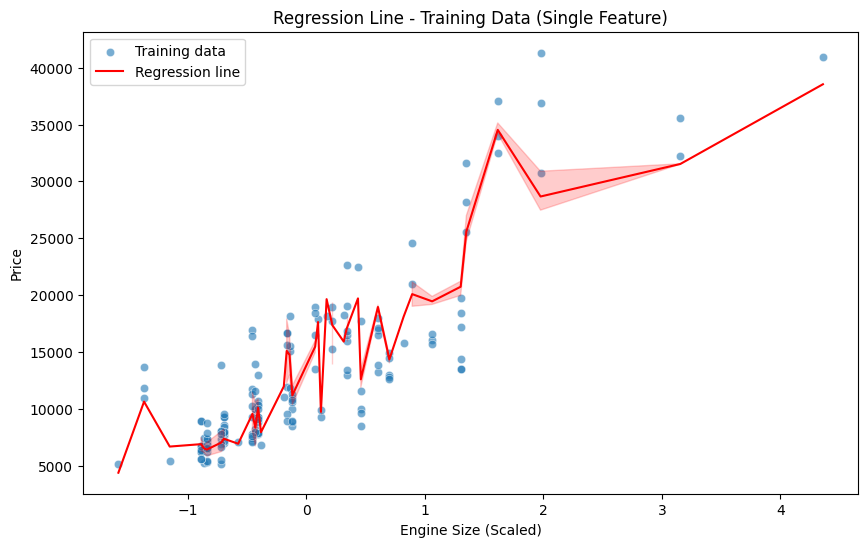

In [ ]:
# Visualization: Regression Line (for a single feature)
# Selecting a single feature for visualization
single_feature_index = X.columns.get_loc('enginesize')  # Replace 'enginesize' with the feature you want to visualize

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train[:, single_feature_index], y=y_train, alpha=0.6, label='Training data')
sns.lineplot(x=X_train[:, single_feature_index], y=y_train_pred, color='red', label='Regression line')
plt.title('Regression Line - Training Data (Single Feature)')
plt.xlabel('Engine Size (Scaled)')
plt.ylabel('Price')
plt.legend()
plt.show()

##Conclusions

Here are the key points and conclusions derived from the analysis:

1) Data Quality and Integrity:

 - Missing Values: There are no missing values in the dataset, ensuring data completeness.
 - Duplicate Rows: No duplicate rows were found, indicating data uniqueness.

2) Descriptive Statistics:

 - The dataset includes 205 observations and 25 features (after dropping the car_ID column).
 - The mean price of the cars is approximately 13,276.71 \$, with a standard deviation of 7,988.85 \$.
 - The dataset covers a wide range of prices, from 5,118 \$ to 45,400 \$  .

3) Categorical Features:

 - There are several categorical features such as CarName, fueltype, aspiration, doornumber, carbody, drivewheel, enginelocation, enginetype, cylindernumber, and fuelsystem.
 - The CarName feature has the highest number of unique values (147), indicating a diverse set of car models.

4) Feature Correlations with Price:

 - Strong Positive Correlations: Features like enginesize (0.874), curbweight (0.835), and horsepower (0.808) have strong positive correlations with the price.
 - Moderate Positive Correlations: Features like carwidth (0.759), carlength (0.683), and drivewheel (0.578) show moderate positive correlations.
 - Negative Correlations: Features like citympg (-0.686) and highwaympg (-0.698) have strong negative correlations with price, indicating that higher fuel efficiency tends to be associated with lower prices.

5) Model Performance:

Training Set Performance:

 - Mean Squared Error (MSE): 6,278,621.90
 - Root Mean Squared Error (RMSE): 2,505.72
 - Mean Absolute Error (MAE): 1,833.32
 - R-squared: 0.8854

Testing Set Performance:

 - Mean Squared Error (MSE): 10,739,032.94
 - Root Mean Squared Error (RMSE): 3,277.05
 - Mean Absolute Error (MAE): 2,427.73
 - R-squared: 0.8860

The model performs well on both the training and testing sets, with high R-squared values indicating that the model explains approximately 88.5% of the variance in the car prices. However, the higher RMSE and MAE values on the testing set suggest room for improvement in predictive accuracy.